In [24]:
def get_geotiff():
    with rasterio.open("AHN3.tif") as src:
        elev_data = src.read(1)
        
        # replace all 1e38 values with 0
        elev_data[elev_data >= 1e37] = 0
        return elev_data, src


<IPython.core.display.Javascript object>


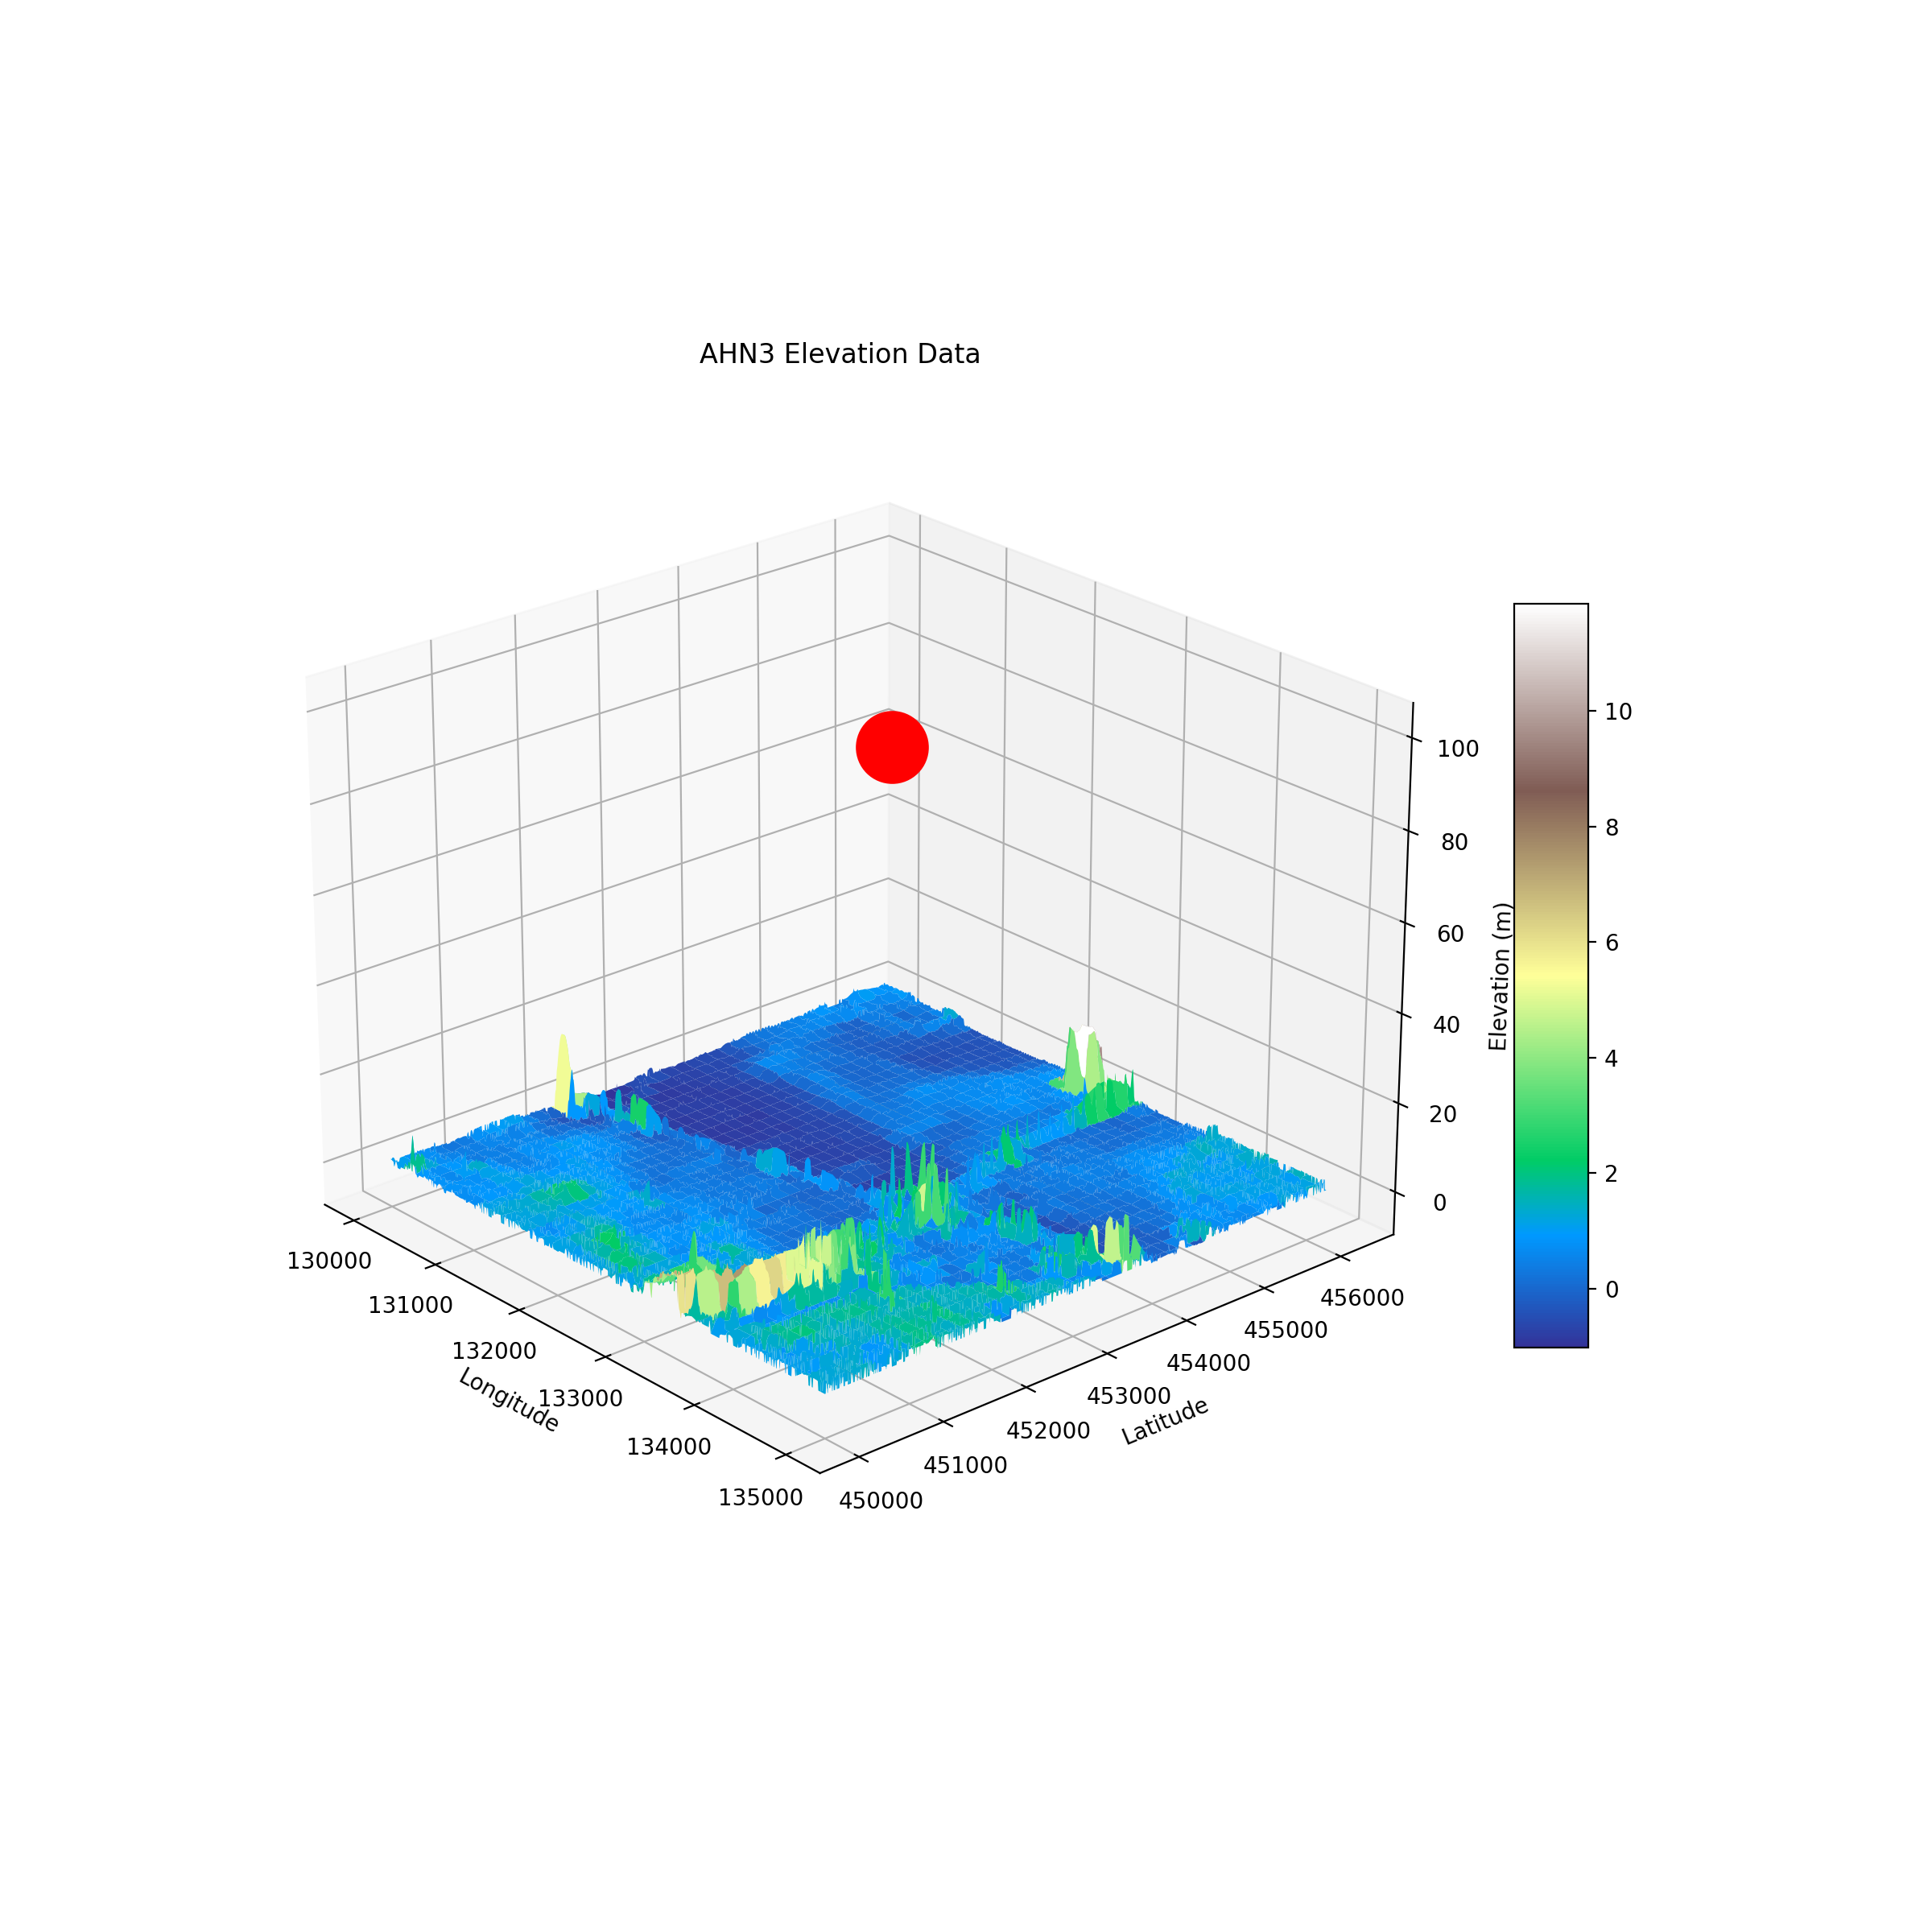

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import rasterio
from matplotlib.animation import FuncAnimation
%matplotlib notebook

def preview_geotiff_3d(stride=30):
    # Load the GeoTIFF file
    elev_data, src = get_geotiff()

    # Create a figure and a 3D axis object
    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(111, projection='3d')

    # Create a 3D coordinate to place the dot
    x, y, z = 133000,453000,100

    # Add a scatter plot to the 3D plot to plot the dot
    ax.scatter(x, y, z, color='red', s=1000)
    
    # Get the dimensions of the elevation data
    ny, nx = elev_data.shape
    x, y = np.linspace(src.bounds.left, src.bounds.right, nx), np.linspace(src.bounds.bottom, src.bounds.top, ny)
    X, Y = np.meshgrid(x, y)

    # Plot the elevation data as a surface plot
    surf = ax.plot_surface(X, Y, elev_data, cmap='terrain', linewidth=0, antialiased=True, rstride=stride, cstride=stride)
    # Alternative: cmap='gray'

    # Set the plot title and axis labels
    ax.set_title("AHN3 Elevation Data")
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    ax.set_zlabel("Elevation (m)")

    # Add a colorbar to the plot
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)

    # Show the plot
    plt.show()

preview_geotiff_3d()
